# Text Classification with RNN models #

## **Objective** ##
I have done the tokenization and word embeddings and Trained some neural network models with Imdb and sarcasm datasets.

But In all those examples we didn't care about the order of the words or dependencies and relationship among the words and the contex.

In this project we will be learning those things with RNN and LSTM.

Here in this project we will be using imdb_subwords instead of imdb raw data.

Happy Learning :)

## **Imdb-subwords dataset** ##
This is the extended version of imdb_reviews dataset. It has tokens instead of raw texts so no tokenization required here.

### **Data Collection and Preprocessing** ####
The dataset is available in tensorflow_datasets so no need to download explicitly

In [28]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### **Load data** ####

In [2]:
imdb,info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGX28ZC/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGX28ZC/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGX28ZC/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


#### **Train-Test split** ####

In [23]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = imdb['train'], imdb['test'],

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

#### **pre-tokenizer from subwords dataset** ####
We don't use it here since we already have tokens but can be used further.

In [4]:
tokenizer = info.features['text'].encoder

## **LSTM-Long short time memory** ##

Normal RNN's are used to store the context.In addition to the context that has been passed in RNN, LSTM has an additional pipeline of contexts called "cell state" this can pass through the network. Cell state can be bidirectional so later state can impact the erlier state also  .


**LSTM** :- powerful, preferable, has 3 gates{output,forget,update}

**GRU** :- simlper, has 2 gates{output,update}

### **LSTM implementation** ###

similar to the model we have created earlier , but an additional LSTM layer is used.

LSTM(64) :- number of outputs from LSTM is 64.

since the LSTM layer here is bidirectional so it creates 128 outputs instead of 64.

### **Single Layer LSTM** ###

#### **Model creation** ####

In [5]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598209 (2.28 MB)
Trainable params: 598209 (2.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Model Train** ####

In [6]:
# Set the training parameters
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

history1 = model1.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 47s 417ms/step - loss: 0.5863 - accuracy: 0.6779 - val_loss: 0.4907 - val_accuracy: 0.7688
Epoch 2/10
98/98 [==============================] - 29s 292ms/step - loss: 0.3321 - accuracy: 0.8652 - val_loss: 0.3723 - val_accuracy: 0.8452
Epoch 3/10
98/98 [==============================] - 31s 316ms/step - loss: 0.2530 - accuracy: 0.9068 - val_loss: 0.4137 - val_accuracy: 0.8246
Epoch 4/10
98/98 [==============================] - 26s 259ms/step - loss: 0.1998 - accuracy: 0.9301 - val_loss: 0.3855 - val_accuracy: 0.8496
Epoch 5/10
98/98 [==============================] - 26s 260ms/step - loss: 0.1792 - accuracy: 0.9377 - val_loss: 0.4170 - val_accuracy: 0.8453
Epoch 6/10
98/98 [==============================] - 24s 239ms/step - loss: 0.1485 - accuracy: 0.9488 - val_loss: 0.5493 - val_accuracy: 0.8319
Epoch 7/10
98/98 [==============================] - 23s 235ms/step - loss: 0.1814 - accuracy: 0.9305 - val_loss: 0.5096 - val_accuracy: 0.8376

#### **Traning Visualization** ####

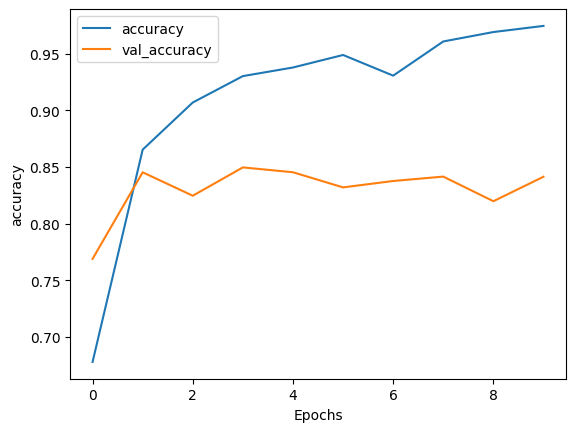

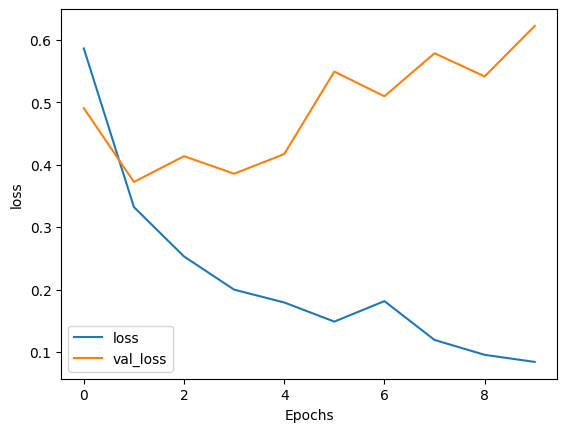

In [8]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

#### **Model Test** ####
Time for testing...

In [27]:
# Iterate over the test dataset, get predictions, and actual labels
predictions = []
actual_labels = []

for input_sequence, label in test_dataset:
    # Make predictions on the current batch
    batch_predictions = model1.predict(input_sequence)

    # Append the predictions and actual labels to their respective lists
    predictions.extend(batch_predictions)
    actual_labels.extend(label.numpy())

# Convert the predictions to binary labels (0 or 1)
binary_predictions = [int(pred > 0.5) for pred in predictions]

# Print or use the binary_predictions and actual_labels as needed
print("Binary Predictions:", binary_predictions)
print("Actual Labels:", actual_labels)


6/6 [==============================] - 0s 32ms/step
Binary Predictions: [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

**Evaluation Metrics**

In [29]:
# Accuracy
accuracy = accuracy_score(actual_labels, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(actual_labels, binary_predictions)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(actual_labels, binary_predictions)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(actual_labels, binary_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8413
Precision: 0.8312
Recall: 0.8566
F1 Score: 0.8437


### **Multi Layer LSTM** ###
It is similar to the above one bit here we use more than one LSTM layers.

return_sequences = True ensures that the output of LSTM matches with the next input layer.

#### **Model Creation** ####

In [30]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 128)         66048     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 63532

#### **Model Train** ####

In [31]:
# Set the training parameters
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

# Train the model
history2 = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 61s 525ms/step - loss: 0.6111 - accuracy: 0.6646 - val_loss: 0.5066 - val_accuracy: 0.7674
Epoch 2/10
98/98 [==============================] - 56s 566ms/step - loss: 0.4085 - accuracy: 0.8246 - val_loss: 0.4764 - val_accuracy: 0.7772
Epoch 3/10
98/98 [==============================] - 47s 481ms/step - loss: 0.3422 - accuracy: 0.8596 - val_loss: 0.4103 - val_accuracy: 0.8325
Epoch 4/10
98/98 [==============================] - 51s 519ms/step - loss: 0.3151 - accuracy: 0.8788 - val_loss: 0.5321 - val_accuracy: 0.7924
Epoch 5/10
98/98 [==============================] - 42s 425ms/step - loss: 0.2639 - accuracy: 0.8995 - val_loss: 0.4004 - val_accuracy: 0.8408
Epoch 6/10
98/98 [==============================] - 40s 411ms/step - loss: 0.1899 - accuracy: 0.9328 - val_loss: 0.5266 - val_accuracy: 0.7743
Epoch 7/10
98/98 [==============================] - 41s 417ms/step - loss: 0.1623 - accuracy: 0.9432 - val_loss: 0.5198 - val_accuracy: 0.8157

#### **Training Visualization** ####

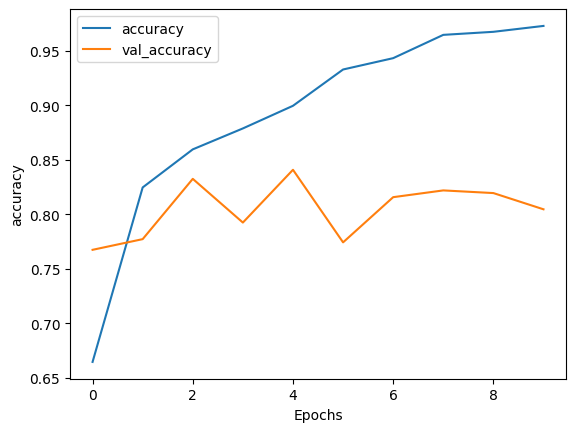

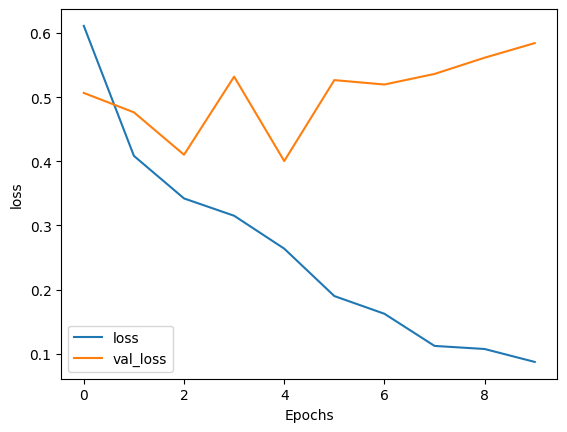

In [32]:
# Plot the accuracy and results
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

We can change our number of epochs to get the better accuracy. The multi layer LSTM has smoother accuracy and loss curves than the single layer LSTM. So we can confidently say that the Multi layer LSTM works fine better than Single Layer LSTM.

#### **Model testing** ####
Time for testing....

In [33]:
# Iterate over the test dataset, get predictions, and actual labels
predictions = []
actual_labels = []

for input_sequence, label in test_dataset:
    # Make predictions on the current batch
    batch_predictions = model2.predict(input_sequence)

    # Append the predictions and actual labels to their respective lists
    predictions.extend(batch_predictions)
    actual_labels.extend(label.numpy())

# Convert the predictions to binary labels (0 or 1)
binary_predictions = [int(pred > 0.5) for pred in predictions]

# Print or use the binary_predictions and actual_labels as needed
print("Binary Predictions:", binary_predictions)
print("Actual Labels:", actual_labels)


6/6 [==============================] - 2s 65ms/step
Binary Predictions: [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 

**Evaluation metrics**

In [34]:
# Accuracy
accuracy = accuracy_score(actual_labels, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(actual_labels, binary_predictions)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(actual_labels, binary_predictions)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(actual_labels, binary_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8046
Precision: 0.8609
Recall: 0.7266
F1 Score: 0.7881


## GRU - Gated recurrent Unit ##

### **Model Creation** ###

In [35]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                18816     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 543053 (2.07 MB)
Trainable params: 543053 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Model Train** ###

In [36]:
# Set the training parameters
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

# Train the model
history3 = model3.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 33s 285ms/step - loss: 0.6673 - accuracy: 0.5739 - val_loss: 0.5872 - val_accuracy: 0.6961
Epoch 2/10
98/98 [==============================] - 26s 260ms/step - loss: 0.4694 - accuracy: 0.7916 - val_loss: 0.4962 - val_accuracy: 0.7790
Epoch 3/10
98/98 [==============================] - 21s 211ms/step - loss: 0.3631 - accuracy: 0.8526 - val_loss: 0.4533 - val_accuracy: 0.8032
Epoch 4/10
98/98 [==============================] - 23s 229ms/step - loss: 0.3192 - accuracy: 0.8753 - val_loss: 0.4490 - val_accuracy: 0.8180
Epoch 5/10
98/98 [==============================] - 29s 295ms/step - loss: 0.2618 - accuracy: 0.9049 - val_loss: 0.4314 - val_accuracy: 0.8194
Epoch 6/10
98/98 [==============================] - 17s 167ms/step - loss: 0.2242 - accuracy: 0.9203 - val_loss: 0.4358 - val_accuracy: 0.8341
Epoch 7/10
98/98 [==============================] - 18s 178ms/step - loss: 0.2316 - accuracy: 0.9176 - val_loss: 0.4466 - val_accuracy: 0.8324

### **Training Visualization** ###

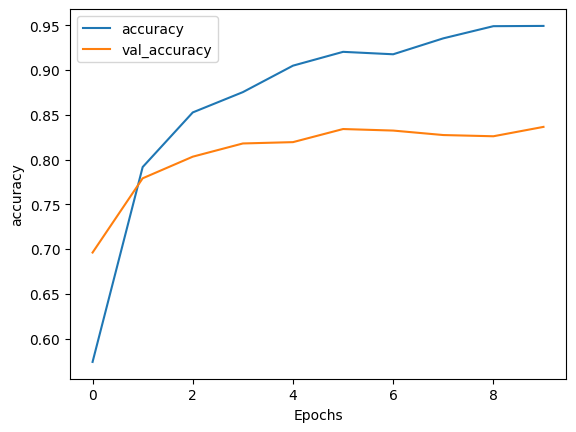

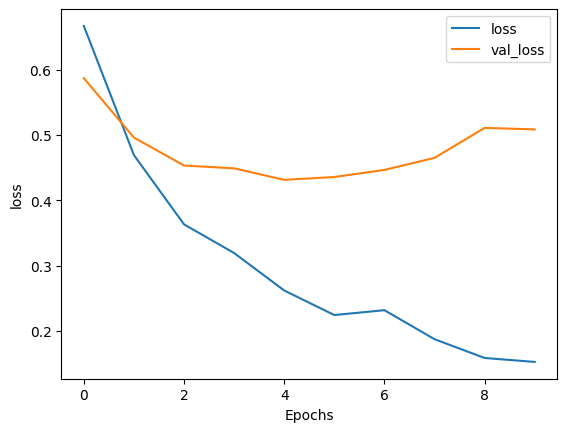

In [37]:
# Plot the accuracy and results
plot_graphs(history3, "accuracy")
plot_graphs(history3, "loss")

### **Model testing** ###

In [38]:
# Iterate over the test dataset, get predictions, and actual labels
predictions = []
actual_labels = []

for input_sequence, label in test_dataset:
    # Make predictions on the current batch
    batch_predictions = model3.predict(input_sequence)

    # Append the predictions and actual labels to their respective lists
    predictions.extend(batch_predictions)
    actual_labels.extend(label.numpy())

# Convert the predictions to binary labels (0 or 1)
binary_predictions = [int(pred > 0.5) for pred in predictions]

# Print or use the binary_predictions and actual_labels as needed
print("Binary Predictions:", binary_predictions)
print("Actual Labels:", actual_labels)


6/6 [==============================] - 1s 34ms/step
Binary Predictions: [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

**Evaluation metrics**

In [39]:
# Accuracy
accuracy = accuracy_score(actual_labels, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(actual_labels, binary_predictions)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(actual_labels, binary_predictions)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(actual_labels, binary_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8365
Precision: 0.8349
Recall: 0.8389
F1 Score: 0.8369


## **Using Convolutional Network** ##
Replace the RNN layer with Convolution1D()

### **Model creation** ###

In [40]:
# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,64),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size,activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         41088     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 568049 (2.17 MB)
Trainable params: 568049 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### **Model Train** ###

In [41]:
# Set the training parameters
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

# Train the model
history4 = model4.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 130s 1s/step - loss: 0.6780 - accuracy: 0.5800 - val_loss: 0.5890 - val_accuracy: 0.7722
Epoch 2/10
98/98 [==============================] - 43s 439ms/step - loss: 0.3841 - accuracy: 0.8523 - val_loss: 0.3339 - val_accuracy: 0.8683
Epoch 3/10
98/98 [==============================] - 29s 291ms/step - loss: 0.2436 - accuracy: 0.9122 - val_loss: 0.3111 - val_accuracy: 0.8777
Epoch 4/10
98/98 [==============================] - 22s 219ms/step - loss: 0.1964 - accuracy: 0.9300 - val_loss: 0.3176 - val_accuracy: 0.8775
Epoch 5/10
98/98 [==============================] - 19s 190ms/step - loss: 0.1623 - accuracy: 0.9430 - val_loss: 0.3378 - val_accuracy: 0.8753
Epoch 6/10
98/98 [==============================] - 16s 161ms/step - loss: 0.1385 - accuracy: 0.9536 - val_loss: 0.3656 - val_accuracy: 0.8716
Epoch 7/10
98/98 [==============================] - 18s 185ms/step - loss: 0.1225 - accuracy: 0.9591 - val_loss: 0.3947 - val_accuracy: 0.8686
E

### **Training Visualization** ###

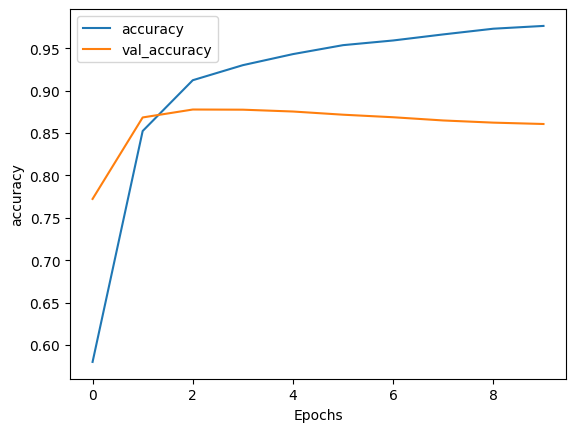

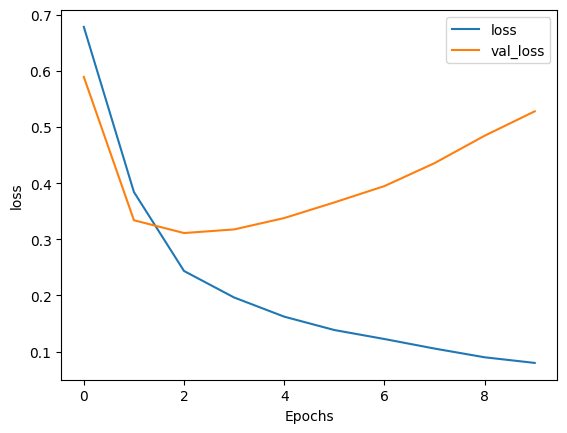

In [42]:
# Plot the accuracy and results
plot_graphs(history4, "accuracy")
plot_graphs(history4, "loss")

### **Model Test** ###

In [43]:
# Iterate over the test dataset, get predictions, and actual labels
predictions = []
actual_labels = []

for input_sequence, label in test_dataset:
    # Make predictions on the current batch
    batch_predictions = model3.predict(input_sequence)

    # Append the predictions and actual labels to their respective lists
    predictions.extend(batch_predictions)
    actual_labels.extend(label.numpy())

# Convert the predictions to binary labels (0 or 1)
binary_predictions = [int(pred > 0.5) for pred in predictions]

# Print or use the binary_predictions and actual_labels as needed
print("Binary Predictions:", binary_predictions)
print("Actual Labels:", actual_labels)

6/6 [==============================] - 0s 32ms/step
Binary Predictions: [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 

**Evaluation Metrics**

In [44]:
# Accuracy
accuracy = accuracy_score(actual_labels, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(actual_labels, binary_predictions)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(actual_labels, binary_predictions)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(actual_labels, binary_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8365
Precision: 0.8349
Recall: 0.8389
F1 Score: 0.8369


# **Sarcasm Dataset** #
In the another notebook I have discussed what is sarcasm dataset, Now I am only going to implement it with LSTM and Convolutional layers

## **Data Preprocessing** ##

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

### **Data Collection** ###

In [46]:
import json

with open("/content/Sarcasm_Headlines_Dataset.json",'r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

### **Train-test split** ###

In [47]:
training_size = 20000
training_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]

### **Tokenization** ###

In [50]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded_sequences = pad_sequences(training_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = pad_sequences(test_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)


In [53]:
training_labels_final = np.array(training_labels)
test_labels_final = np.array(test_labels)

## **LSTM** ##

### **Model Creation** ###

In [55]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Print the model summary
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 16)            160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 24)                1560      
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Model Train** ###

In [56]:
# Compile the model
model_lstm.compile(optimizer='adam',  # You can choose other optimizers like 'sgd', 'rmsprop', etc.
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])  # You can add more metrics if needed

# Train the model
epochs = 10  # Specify the number of training epochs
history_lstm = model_lstm.fit(training_padded_sequences, training_labels_final, epochs=epochs,  validation_data=(test_padded_sequences,test_labels_final))

Epoch 1/10
625/625 [==============================] - 43s 63ms/step - loss: 0.4207 - accuracy: 0.7928 - val_loss: 0.3318 - val_accuracy: 0.8585
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2300 - accuracy: 0.9056 - val_loss: 0.3515 - val_accuracy: 0.8508
Epoch 3/10
625/625 [==============================] - 7s 10ms/step - loss: 0.1621 - accuracy: 0.9388 - val_loss: 0.4124 - val_accuracy: 0.8454
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1236 - accuracy: 0.9549 - val_loss: 0.4676 - val_accuracy: 0.8401
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0901 - accuracy: 0.9693 - val_loss: 0.5378 - val_accuracy: 0.8337
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0648 - accuracy: 0.9787 - val_loss: 0.6547 - val_accuracy: 0.8340
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.7123 - val_accuracy: 0.8286

### **Training Visualization** ###

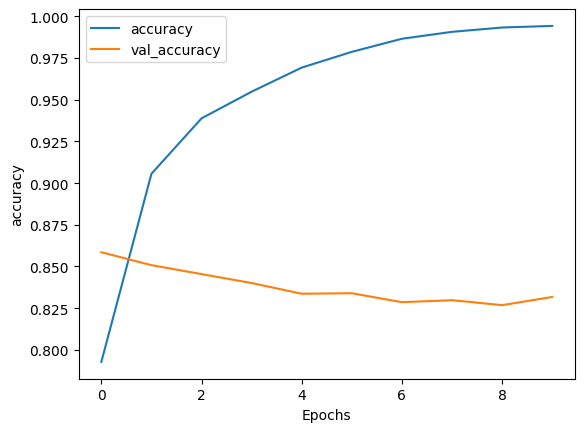

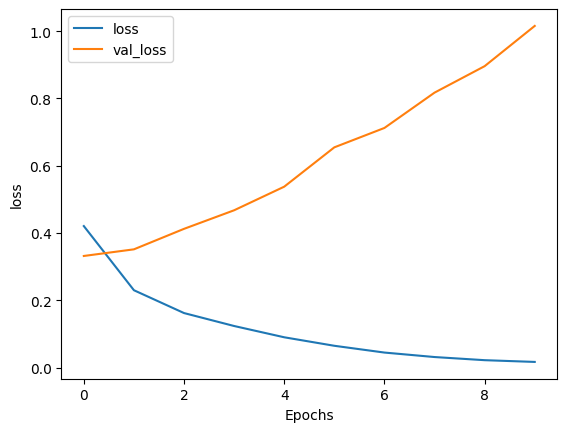

In [57]:
#Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

### **Model Test** ###

In [58]:
# Assuming your model is already trained and you have testing data
predictions = model_lstm.predict(test_padded_sequences)

# If you have binary classification, you might want to convert the probabilities to class labels (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)
#binary_predictions

210/210 [==============================] - 3s 6ms/step


In [60]:
# Accuracy
accuracy = accuracy_score(test_labels_final, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(test_labels_final, binary_predictions)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(test_labels_final, binary_predictions)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(test_labels_final, binary_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8317
Precision: 0.8285
Recall: 0.7751
F1 Score: 0.8009


## **Using Convolutional Layer** ##

### **Model Creation** ###

In [61]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Print the model summary
model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 32, 16)            160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           10368     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_10 (Dense)            (None, 6)                 774       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

### **Model Train** ###

In [62]:
# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model
epochs = 10  # Specify the number of training epochs
history_conv = model_conv.fit(training_padded_sequences, training_labels_final, epochs=epochs,  validation_data=(test_padded_sequences,test_labels_final))

Epoch 1/10
625/625 [==============================] - 15s 20ms/step - loss: 0.5316 - accuracy: 0.7516 - val_loss: 0.4522 - val_accuracy: 0.8307
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3479 - accuracy: 0.8855 - val_loss: 0.4106 - val_accuracy: 0.8372
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2335 - accuracy: 0.9347 - val_loss: 0.4343 - val_accuracy: 0.8399
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1629 - accuracy: 0.9601 - val_loss: 0.4988 - val_accuracy: 0.8314
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1264 - accuracy: 0.9700 - val_loss: 0.5581 - val_accuracy: 0.8317
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1070 - accuracy: 0.9747 - val_loss: 0.6162 - val_accuracy: 0.8331
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0930 - accuracy: 0.9776 - val_loss: 0.6864 - val_accuracy: 0.8341
Epo

###  **Training Visualization** ###

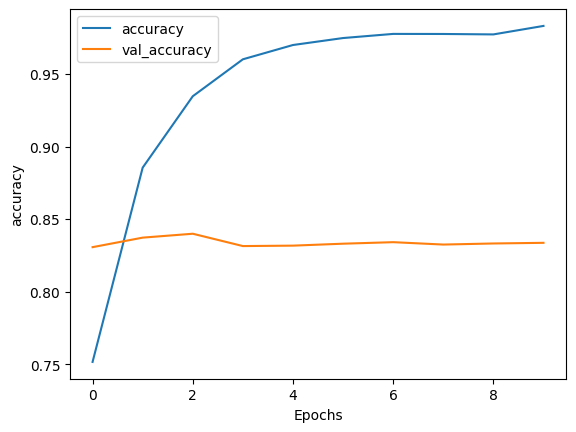

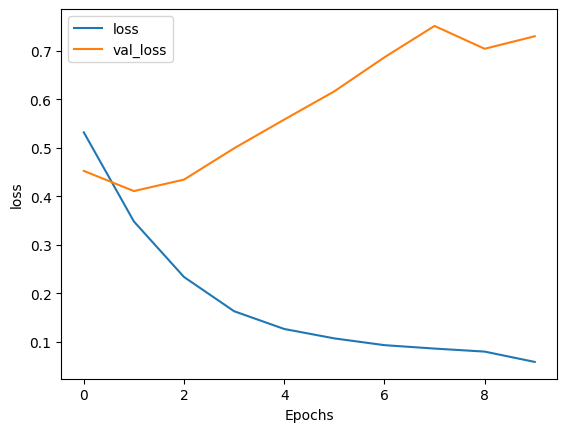

In [63]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

### **Model Test** ###

In [65]:
# Assuming your model is already trained and you have testing data
predictions = model_conv.predict(test_padded_sequences)

# If you have binary classification, you might want to convert the probabilities to class labels (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)
#binary_predictions

210/210 [==============================] - 0s 2ms/step


**Evaluation Metrics**

In [66]:
# Accuracy
accuracy = accuracy_score(test_labels_final, binary_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(test_labels_final, binary_predictions)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(test_labels_final, binary_predictions)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(test_labels_final, binary_predictions)
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8337
Precision: 0.7915
Recall: 0.8406
F1 Score: 0.8153
